In [2]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 3.3 MB/s eta 0:00:00a 0:00:01


In [ ]:
OGB MAG batch_size 32 epoch 5

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "experiment_results_updated_e.csv" 

data = pd.read_csv(file_path)
data = data.drop(["Validation Accuracy"], axis = 1)
print(data.head(5))

       Model Library Format   Dataset  E2E Time (s)  Training Time (s)  \
0        GCN     PyG    COO  ogbn-mag    553.418338         548.772003   
1        GCN     PyG    CSR  ogbn-mag    480.904412         478.252609   
2        GCN     PyG    CSC  ogbn-mag    471.562669         467.524657   
3  GraphSAGE     PyG    COO  ogbn-mag    811.476140         808.307613   
4  GraphSAGE     PyG    CSR  ogbn-mag    800.374299         797.640010   

   Inference Time (s) Device  
0            2.653905    cpu  
1            0.956494    cpu  
2            1.018539    cpu  
3            1.490041    cpu  
4            1.070132    cpu  


Podstawowe informacje o danych:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Model               18 non-null     object 
 1   Library             18 non-null     object 
 2   Format              18 non-null     object 
 3   Dataset             18 non-null     object 
 4   E2E Time (s)        18 non-null     float64
 5   Training Time (s)   18 non-null     float64
 6   Inference Time (s)  18 non-null     float64
 7   Device              18 non-null     object 
dtypes: float64(3), object(5)
memory usage: 1.2+ KB
None

Podgląd danych:

       Model Library Format   Dataset  E2E Time (s)  Training Time (s)  \
0        GCN     PyG    COO  ogbn-mag    553.418338         548.772003   
1        GCN     PyG    CSR  ogbn-mag    480.904412         478.252609   
2        GCN     PyG    CSC  ogbn-mag    471.562669         467.524657   
3  G

/tmp/ipykernel_1001240/2944935409.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=data, x='Format', y=metric, hue='Model', ci='sd', palette="viridis")


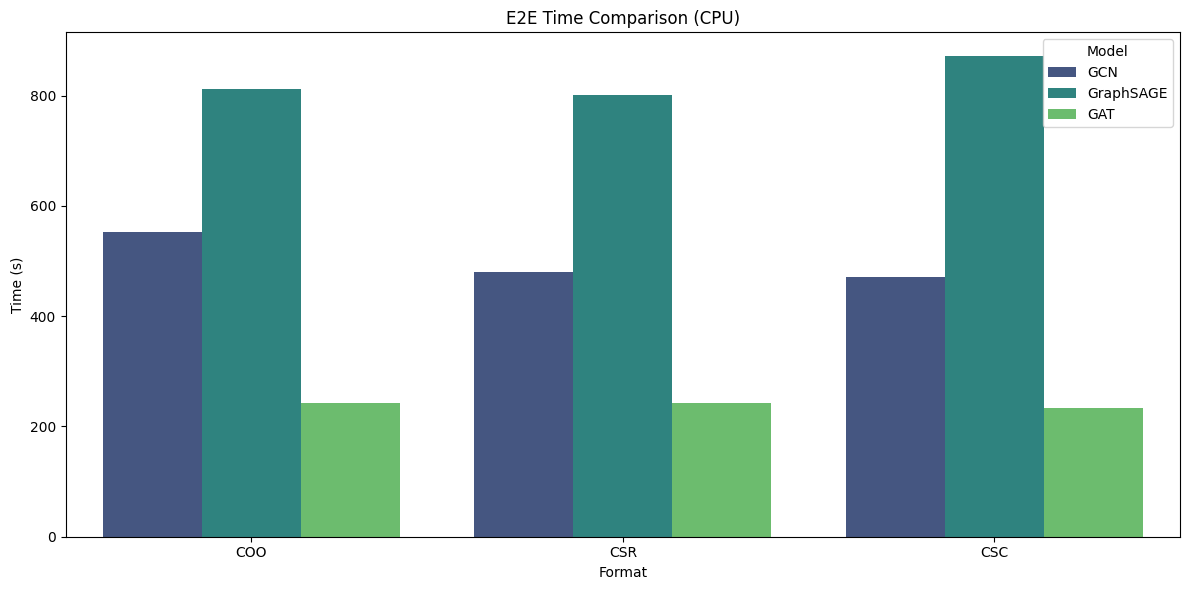

/tmp/ipykernel_1001240/2944935409.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=data, x='Format', y=metric, hue='Model', ci='sd', palette="viridis")


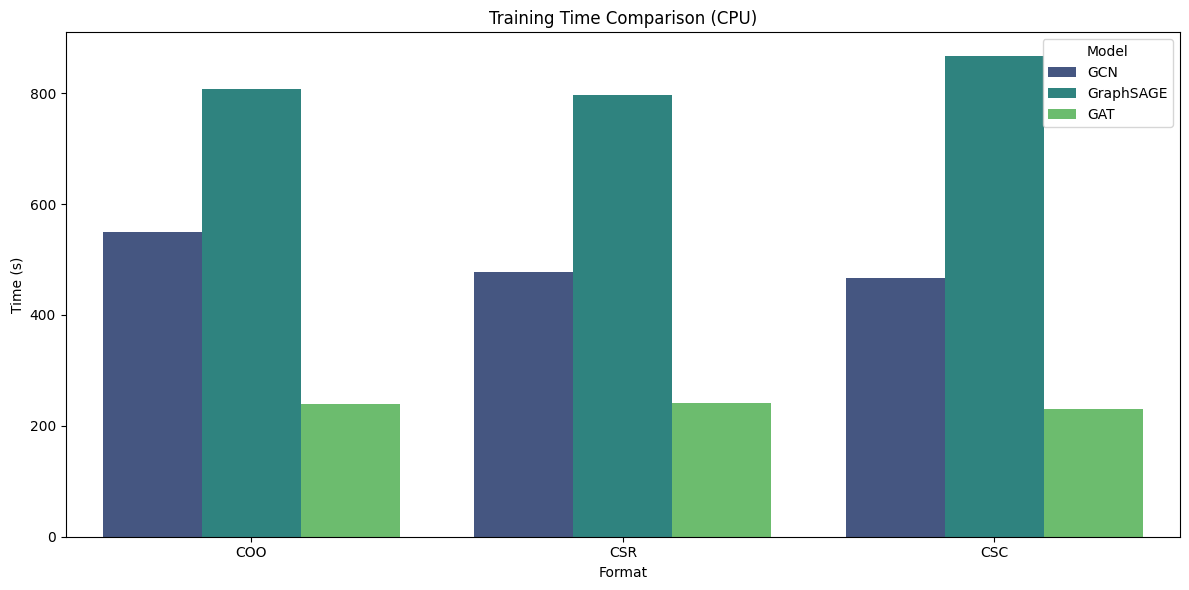

/tmp/ipykernel_1001240/2944935409.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=data, x='Format', y=metric, hue='Model', ci='sd', palette="viridis")


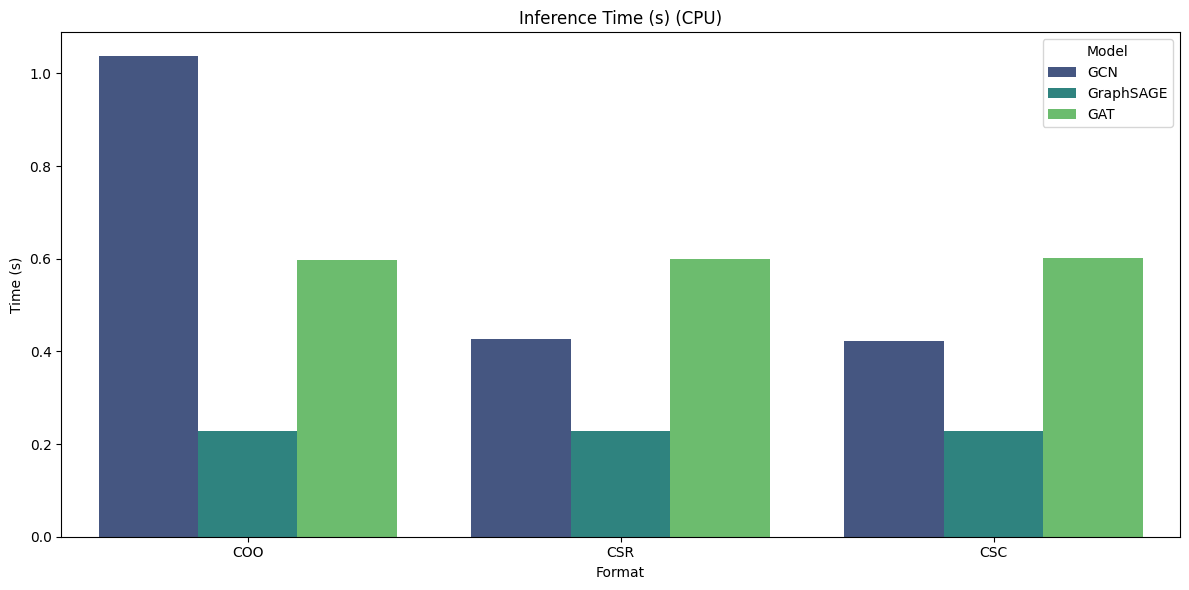

/tmp/ipykernel_1001240/2944935409.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=data, x='Format', y=metric, hue='Model', ci='sd', palette="viridis")


Podsumowanie statystyczne dla GPU:

       E2E Time (s)  Training Time (s)  Inference Time (s)
count      9.000000           9.000000            9.000000
mean     223.555834         221.199170            0.485192
std       41.812466          41.702572            0.262098
min      179.057236         177.026194            0.227175
25%      188.324033         186.309062            0.228854
50%      210.630891         208.261350            0.425927
75%      275.858453         273.443375            0.600235
max      278.404732         275.983460            1.036622

Średnie wartości dla grup (Format, Model):

                  E2E Time (s)  Training Time (s)  Inference Time (s)
Format Model                                                         
COO    GAT          276.876961         274.468212            0.596513
       GCN          208.535776         205.237197            1.036622
       GraphSAGE    183.169451         181.170587            0.228854
CSC    GAT          278.404732        

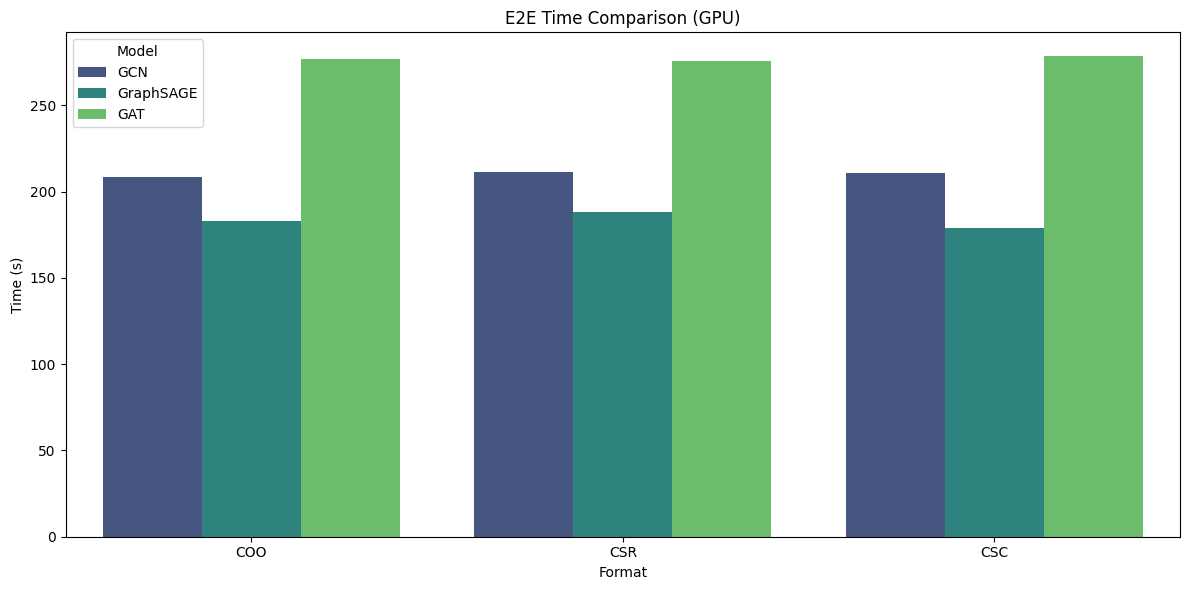

/tmp/ipykernel_1001240/2944935409.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=data, x='Format', y=metric, hue='Model', ci='sd', palette="viridis")


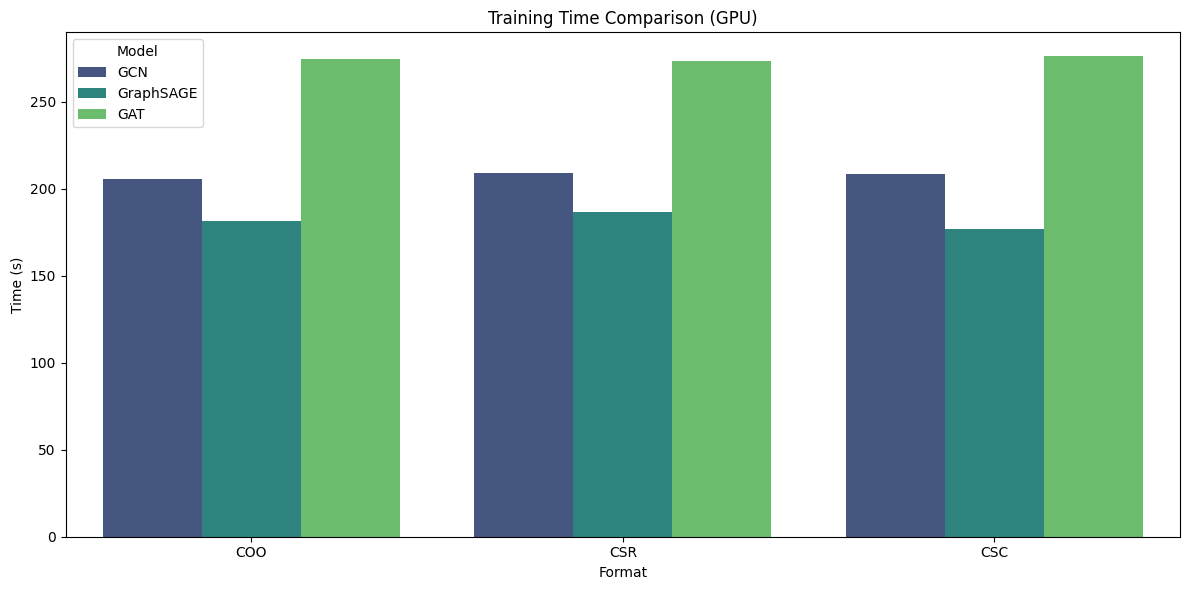

/tmp/ipykernel_1001240/2944935409.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=data, x='Format', y=metric, hue='Model', ci='sd', palette="viridis")


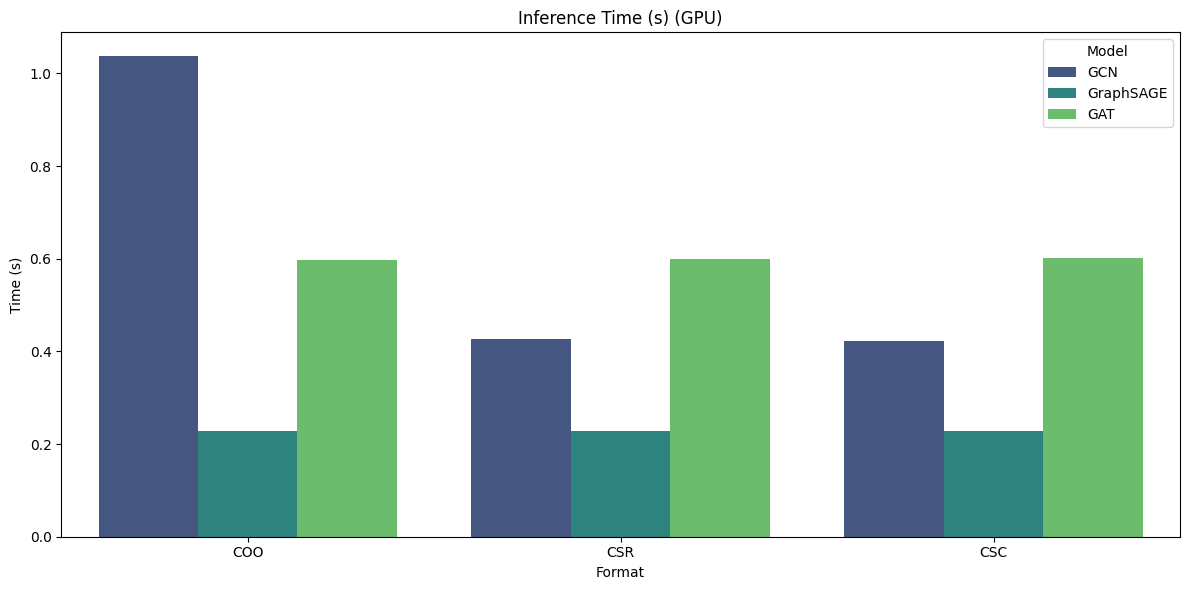


Porównanie trendów między CPU a GPU:

                  CPU E2E Time (s)  CPU Training Time (s)  \
Format Model                                                
COO    GAT              241.960552             239.791803   
       GCN              553.418338             548.772003   
       GraphSAGE        811.476140             808.307613   
CSC    GAT              233.819683             230.296959   
       GCN              471.562669             467.524657   
       GraphSAGE        871.178705             866.513033   
CSR    GAT              242.630492             240.507113   
       GCN              480.904412             478.252609   
       GraphSAGE        800.374299             797.640010   

                  CPU Inference Time (s)  GPU E2E Time (s)  \
Format Model                                                 
COO    GAT                      0.448715        276.876961   
       GCN                      2.653905        208.535776   
       GraphSAGE                1.490041 

In [29]:

# Podział danych na CPU i GPU
cpu_data = data[data['Device'] == 'cpu']
gpu_data = data[data['Device'] == 'cuda']

print("Podstawowe informacje o danych:\n")
print(data.info())
print("\nPodgląd danych:\n")
print(data.head())

# Funkcja do tworzenia wykresów porównawczych
def plot_comparison(data, metric, title, ylabel):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=data, x='Format', y=metric, hue='Model', ci='sd', palette="viridis")
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("Format")
    plt.legend(title="Model")
    plt.tight_layout()
    plt.show()

# Funkcja do obliczania trendów
def calculate_trends(data, group_by_cols, metrics):
    trends = data.groupby(group_by_cols)[metrics].mean()
    print(f"\nŚrednie wartości dla grup ({', '.join(group_by_cols)}):\n")
    print(trends)
    return trends

# Analiza danych CPU
df_cpu_summary = cpu_data.describe()
print("Podsumowanie statystyczne dla CPU:\n")
print(df_cpu_summary)

cpu_trends = calculate_trends(cpu_data, ['Format', 'Model'], ['E2E Time (s)', 'Training Time (s)', 'Inference Time (s)'])

# # Wykresy dla CPU
plot_comparison(cpu_data, 'E2E Time (s)', 'E2E Time Comparison (CPU)', 'Time (s)')
plot_comparison(cpu_data, 'Training Time (s)', 'Training Time Comparison (CPU)', 'Time (s)')
plot_comparison(gpu_data, 'Inference Time (s)', 'Inference Time (s) (CPU)', 'Time (s)')
# Sprawdzenie danych GPU
if not gpu_data.empty:
    df_gpu_summary = gpu_data.describe()
    print("Podsumowanie statystyczne dla GPU:\n")
    print(df_gpu_summary)

    gpu_trends = calculate_trends(gpu_data, ['Format', 'Model'], ['E2E Time (s)', 'Training Time (s)', 'Inference Time (s)'])

    # # Wykresy dla GPU
    plot_comparison(gpu_data, 'E2E Time (s)', 'E2E Time Comparison (GPU)', 'Time (s)')
    plot_comparison(gpu_data, 'Training Time (s)', 'Training Time Comparison (GPU)', 'Time (s)')
    plot_comparison(gpu_data, 'Inference Time (s)', 'Inference Time (s) (GPU)', 'Time (s)')
else:
    print("Brak danych dla GPU. Upewnij się, że dane zostały poprawnie załadowane.")

# Sprawdzenie brakujących danych
missing_values = data.isnull().sum()
#print("\nBrakujące dane w zbiorze:\n")
#print(missing_values)

if not gpu_data.empty:
    combined_trends = pd.concat([
        cpu_trends.rename(columns=lambda x: f"CPU {x}"),
        gpu_trends.rename(columns=lambda x: f"GPU {x}")
    ], axis=1)
    print("\nPorównanie trendów między CPU a GPU:\n")
    print(combined_trends)


In [30]:
#OGB MAG batch_size 32 epoch 5
combined_trends.head(9)

CPU E2E Time (s)  CPU Training Time (s)  \
Format Model                                                
COO    GAT              241.960552             239.791803   
       GCN              553.418338             548.772003   
       GraphSAGE        811.476140             808.307613   
CSC    GAT              233.819683             230.296959   
       GCN              471.562669             467.524657   
       GraphSAGE        871.178705             866.513033   
CSR    GAT              242.630492             240.507113   
       GCN              480.904412             478.252609   
       GraphSAGE        800.374299             797.640010   

                  CPU Inference Time (s)  GPU E2E Time (s)  \
Format Model                                                 
COO    GAT                      0.448715        276.876961   
       GCN                      2.653905        208.535776   
       GraphSAGE                1.490041        183.169451   
CSC    GAT                      0.548562        278.404732   
       GCN                      1.018539        210.630891   
       GraphSAGE                1.716882        179.057236   
CSR    GAT                      0.440903        275.858453   
       GCN                      0.956494        211.144974   
       GraphSAGE                1.070132        188.324033   

                  GPU Training Time (s)  GPU Inference Time (s)  
Format Model                                                     
COO    GAT                   274.468212                0.596513  
       GCN                   205.237197                1.036622  
       GraphSAGE             181.170587                0.228854  
CSC    GAT                   275.983460                0.601712  
       GCN                   208.261350                0.422478  
       GraphSAGE             177.026194                0.227208  
CSR    GAT                   273.443375                0.600235  
       GCN                   208.893091                0.425927  
       GraphSAGE             186.309062                0.227175

OGB ARXIV batch_size 64 epoch 10

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "experiment_results_updated_f_64.csv"  

data = pd.read_csv(file_path)
data = data.drop(["Validation Accuracy"], axis = 1)
print(data.head(5))

In [ ]:

# Podział danych na CPU i GPU
cpu_data = data[data['Device'] == 'cpu']
gpu_data = data[data['Device'] == 'cuda']

print("Podstawowe informacje o danych:\n")
print(data.info())
print("\nPodgląd danych:\n")
print(data.head())

# Funkcja do tworzenia wykresów porównawczych
def plot_comparison(data, metric, title, ylabel):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=data, x='Format', y=metric, hue='Model', ci='sd', palette="viridis")
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("Format")
    plt.legend(title="Model")
    plt.tight_layout()
    plt.show()

# Funkcja do obliczania trendów
def calculate_trends(data, group_by_cols, metrics):
    trends = data.groupby(group_by_cols)[metrics].mean()
    print(f"\nŚrednie wartości dla grup ({', '.join(group_by_cols)}):\n")
    print(trends)
    return trends

# Analiza danych CPU
df_cpu_summary = cpu_data.describe()
print("Podsumowanie statystyczne dla CPU:\n")
print(df_cpu_summary)

cpu_trends = calculate_trends(cpu_data, ['Format', 'Model'], ['E2E Time (s)', 'Training Time (s)', 'Inference Time (s)'])

# # Wykresy dla CPU
plot_comparison(cpu_data, 'E2E Time (s)', 'E2E Time Comparison (CPU)', 'Time (s)')
plot_comparison(cpu_data, 'Training Time (s)', 'Training Time Comparison (CPU)', 'Time (s)')
plot_comparison(gpu_data, 'Inference Time (s)', 'Inference Time (s) (CPU)', 'Time (s)')
# Sprawdzenie danych GPU
if not gpu_data.empty:
    df_gpu_summary = gpu_data.describe()
    print("Podsumowanie statystyczne dla GPU:\n")
    print(df_gpu_summary)

    gpu_trends = calculate_trends(gpu_data, ['Format', 'Model'], ['E2E Time (s)', 'Training Time (s)', 'Inference Time (s)'])

    # # Wykresy dla GPU
    plot_comparison(gpu_data, 'E2E Time (s)', 'E2E Time Comparison (GPU)', 'Time (s)')
    plot_comparison(gpu_data, 'Training Time (s)', 'Training Time Comparison (GPU)', 'Time (s)')
    plot_comparison(gpu_data, 'Inference Time (s)', 'Inference Time (s) (GPU)', 'Time (s)')
else:
    print("Brak danych dla GPU. Upewnij się, że dane zostały poprawnie załadowane.")

# Sprawdzenie brakujących danych
missing_values = data.isnull().sum()
#print("\nBrakujące dane w zbiorze:\n")
#print(missing_values)

if not gpu_data.empty:
    combined_trends = pd.concat([
        cpu_trends.rename(columns=lambda x: f"CPU {x}"),
        gpu_trends.rename(columns=lambda x: f"GPU {x}")
    ], axis=1)
    print("\nPorównanie trendów między CPU a GPU:\n")
    print(combined_trends)


In [24]:
#OGB ARXIV batch_size 64 epoch 10
combined_trends.head(9)

CPU E2E Time (s)  CPU Training Time (s)  \
Format Model                                                
COO    GAT               41.073898              38.830352   
       GCN               65.568575              61.632530   
       GraphSAGE        110.959501             103.786358   
CSC    GAT               45.487158              43.125082   
       GCN               78.547845              73.932249   
       GraphSAGE        110.770707             102.911189   
CSR    GAT               47.009241              44.786795   
       GCN               72.608246              67.590217   
       GraphSAGE        105.218875              97.731832   

                  CPU Inference Time (s)  GPU E2E Time (s)  \
Format Model                                                 
COO    GAT                      0.686754         59.074370   
       GCN                      2.425556         53.910879   
       GraphSAGE                5.619985         51.346657   
CSC    GAT                      0.676242         59.581118   
       GCN                      2.960080         53.981927   
       GraphSAGE                6.226642         51.986752   
CSR    GAT                      0.677043         64.399627   
       GCN                      3.125232         53.725958   
       GraphSAGE                5.987444         52.196354   

                  GPU Training Time (s)  GPU Inference Time (s)  
Format Model                                                     
COO    GAT                    56.644242                0.734511  
       GCN                    50.797138                0.762733  
       GraphSAGE              49.359198                0.294322  
CSC    GAT                    57.143849                0.728265  
       GCN                    51.637735                0.547503  
       GraphSAGE              49.869211                0.327965  
CSR    GAT                    61.977789                0.737608  
       GCN                    51.496321                0.524953  
       GraphSAGE              49.941246                0.353930

In [ ]:
OGB ARXIV batch_size 128 epoch 10

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "experiment_results_updated_g_128.csv"  

data = pd.read_csv(file_path)
data = data.drop(["Validation Accuracy"], axis = 1)
print(data.head(5))

       Model Library Format     Dataset  E2E Time (s)  Training Time (s)  \
0        GCN     PyG    COO  ogbn-arxiv     74.659285          69.420070   
1        GCN     PyG    CSR  ogbn-arxiv     50.383848          46.522090   
2        GCN     PyG    CSC  ogbn-arxiv     66.098434          60.708117   
3  GraphSAGE     PyG    COO  ogbn-arxiv    109.576419         103.428245   
4  GraphSAGE     PyG    CSR  ogbn-arxiv    101.290483          97.683328   

   Inference Time (s) Device  
0            3.698227    cpu  
1            2.302847    cpu  
2            3.715659    cpu  
3            4.597636    cpu  
4            2.124008    cpu  


Podstawowe informacje o danych:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Model               54 non-null     object 
 1   Library             54 non-null     object 
 2   Format              54 non-null     object 
 3   Dataset             54 non-null     object 
 4   E2E Time (s)        54 non-null     float64
 5   Training Time (s)   54 non-null     float64
 6   Inference Time (s)  54 non-null     float64
 7   Device              54 non-null     object 
dtypes: float64(3), object(5)
memory usage: 3.5+ KB
None

Podgląd danych:

       Model Library Format     Dataset  E2E Time (s)  Training Time (s)  \
0        GCN     PyG    COO  ogbn-arxiv     74.659285          69.420070   
1        GCN     PyG    CSR  ogbn-arxiv     50.383848          46.522090   
2        GCN     PyG    CSC  ogbn-arxiv     66.098434          60.708117

/tmp/ipykernel_1001240/2944935409.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=data, x='Format', y=metric, hue='Model', ci='sd', palette="viridis")


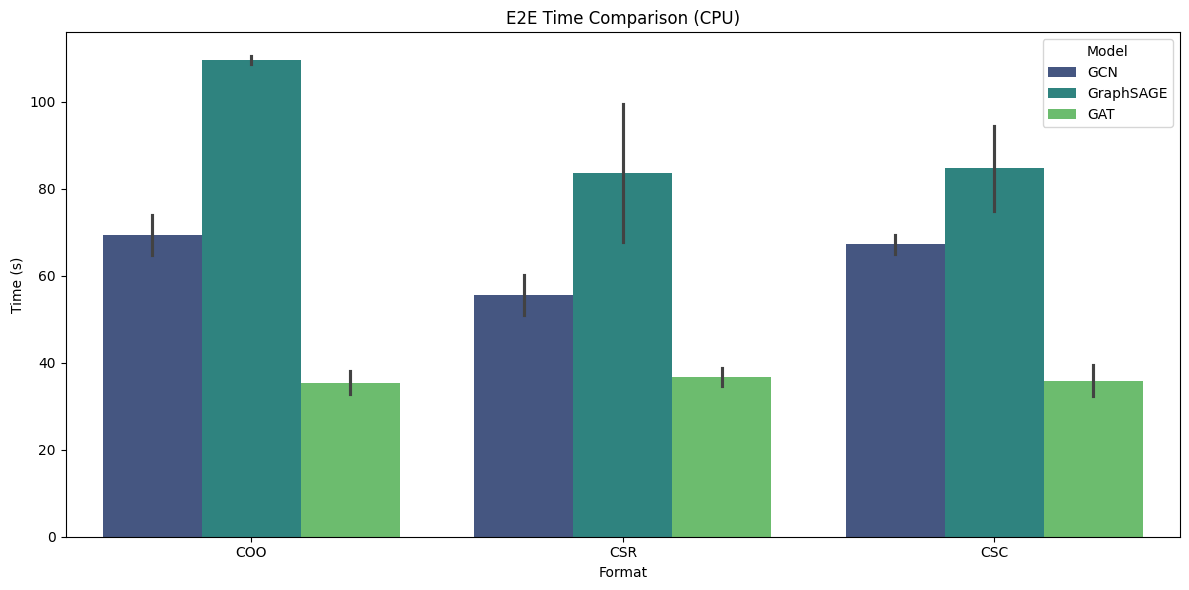

/tmp/ipykernel_1001240/2944935409.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=data, x='Format', y=metric, hue='Model', ci='sd', palette="viridis")


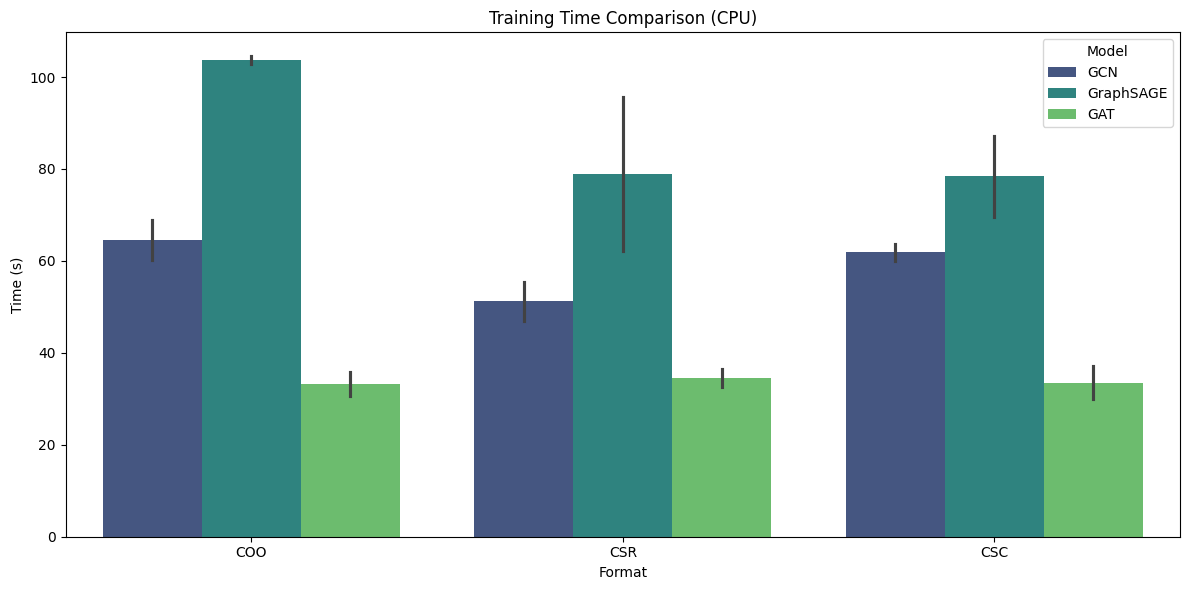

/tmp/ipykernel_1001240/2944935409.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=data, x='Format', y=metric, hue='Model', ci='sd', palette="viridis")


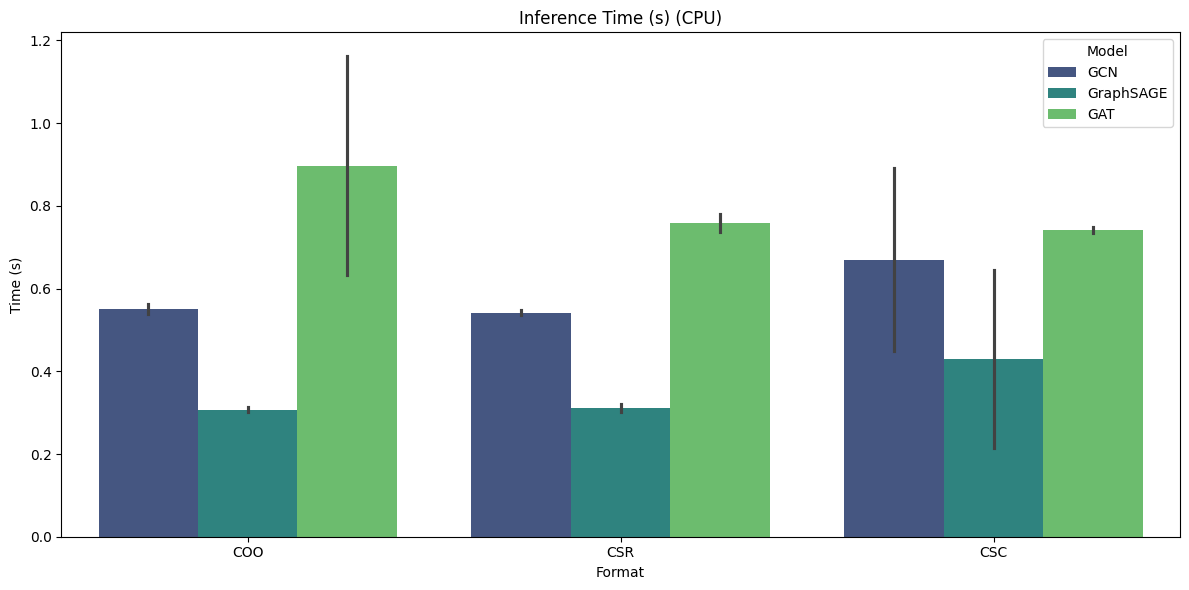

/tmp/ipykernel_1001240/2944935409.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=data, x='Format', y=metric, hue='Model', ci='sd', palette="viridis")


Podsumowanie statystyczne dla GPU:

       E2E Time (s)  Training Time (s)  Inference Time (s)
count     27.000000          27.000000           27.000000
mean      44.835989          42.402359            0.578862
std        3.861454           3.856675            0.227591
min       37.388880          35.098207            0.299685
25%       41.901745          39.897468            0.317601
50%       45.496457          43.206317            0.545473
75%       46.855811          44.216678            0.742895
max       50.640219          48.162117            1.202297

Średnie wartości dla grup (Format, Model):

                  E2E Time (s)  Training Time (s)  Inference Time (s)
Format Model                                                         
COO    GAT           48.430990          45.543240            0.896968
       GCN           43.201519          40.911383            0.551174
       GraphSAGE     41.797931          39.735259            0.307337
CSC    GAT           48.418687        

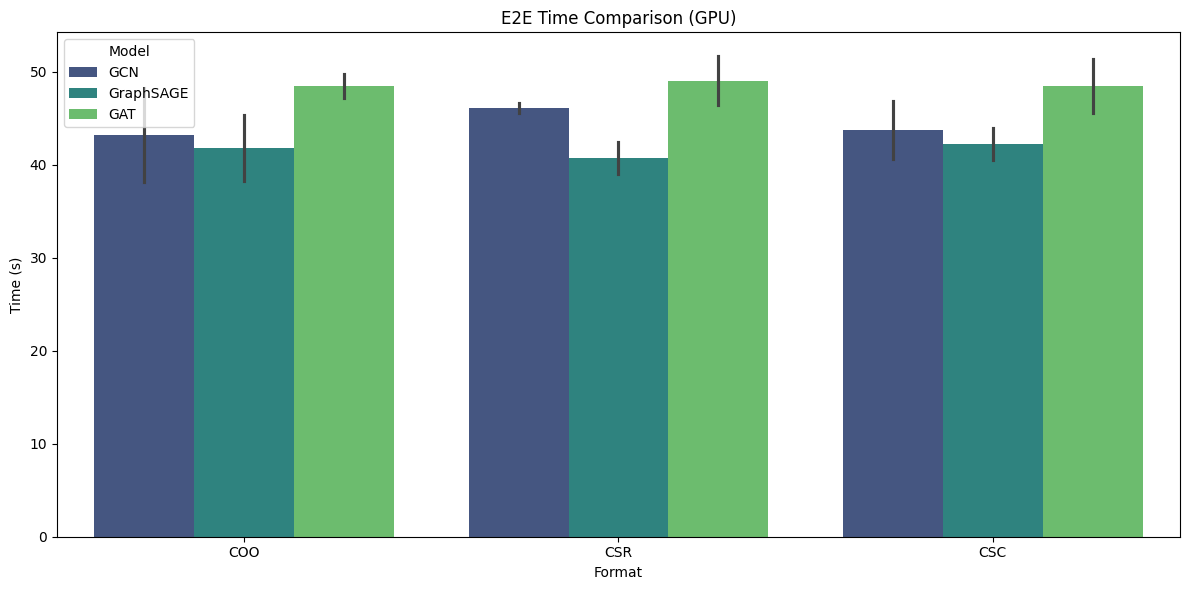

/tmp/ipykernel_1001240/2944935409.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=data, x='Format', y=metric, hue='Model', ci='sd', palette="viridis")


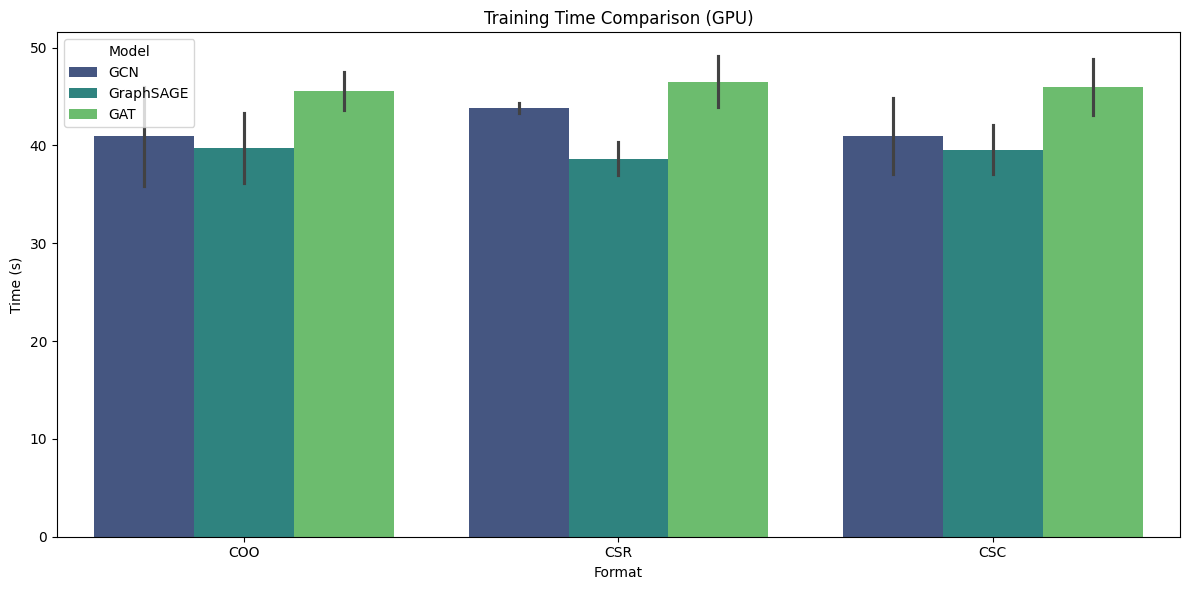

/tmp/ipykernel_1001240/2944935409.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=data, x='Format', y=metric, hue='Model', ci='sd', palette="viridis")


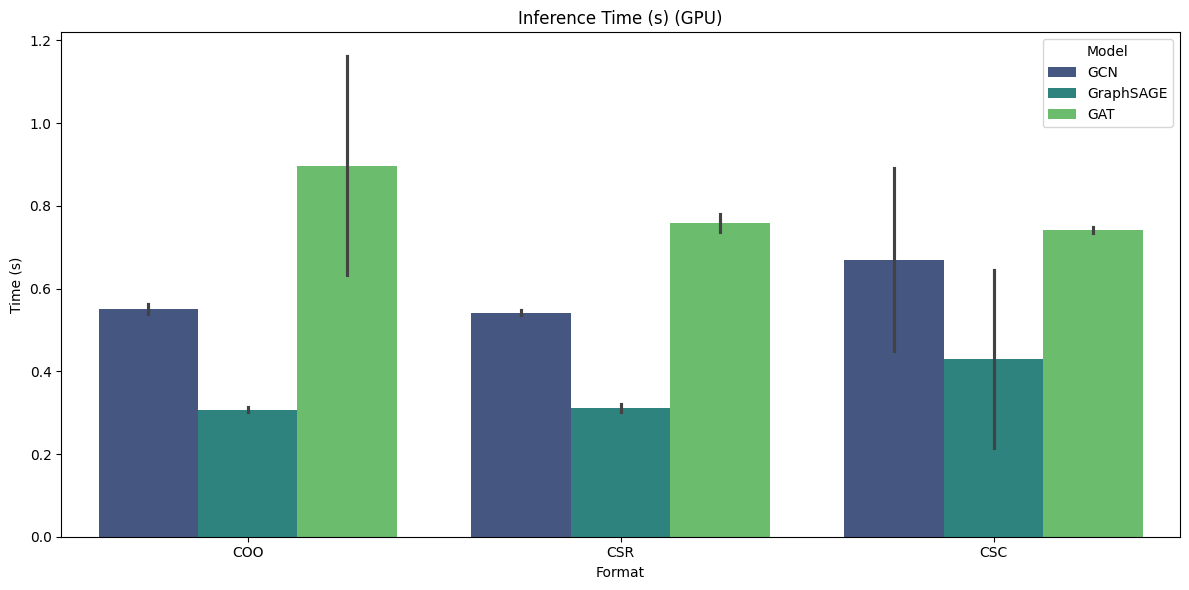


Porównanie trendów między CPU a GPU:

                  CPU E2E Time (s)  CPU Training Time (s)  \
Format Model                                                
COO    GAT               35.417912              33.187780   
       GCN               69.409638              64.570257   
       GraphSAGE        109.574262             103.627049   
CSC    GAT               35.853143              33.484925   
       GCN               67.220784              61.838468   
       GraphSAGE         84.690195              78.448127   
CSR    GAT               36.757961              34.540857   
       GCN               55.606407              51.245070   
       GraphSAGE         83.585867              78.940814   

                  CPU Inference Time (s)  GPU E2E Time (s)  \
Format Model                                                 
COO    GAT                      0.684147         48.430990   
       GCN                      3.301878         43.201519   
       GraphSAGE                4.377698 

In [26]:

# Podział danych na CPU i GPU
cpu_data = data[data['Device'] == 'cpu']
gpu_data = data[data['Device'] == 'cuda']

print("Podstawowe informacje o danych:\n")
print(data.info())
print("\nPodgląd danych:\n")
print(data.head())

# Funkcja do tworzenia wykresów porównawczych
def plot_comparison(data, metric, title, ylabel):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=data, x='Format', y=metric, hue='Model', ci='sd', palette="viridis")
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("Format")
    plt.legend(title="Model")
    plt.tight_layout()
    plt.show()

# Funkcja do obliczania trendów
def calculate_trends(data, group_by_cols, metrics):
    trends = data.groupby(group_by_cols)[metrics].mean()
    print(f"\nŚrednie wartości dla grup ({', '.join(group_by_cols)}):\n")
    print(trends)
    return trends

# Analiza danych CPU
df_cpu_summary = cpu_data.describe()
print("Podsumowanie statystyczne dla CPU:\n")
print(df_cpu_summary)

cpu_trends = calculate_trends(cpu_data, ['Format', 'Model'], ['E2E Time (s)', 'Training Time (s)', 'Inference Time (s)'])

# # Wykresy dla CPU
plot_comparison(cpu_data, 'E2E Time (s)', 'E2E Time Comparison (CPU)', 'Time (s)')
plot_comparison(cpu_data, 'Training Time (s)', 'Training Time Comparison (CPU)', 'Time (s)')
plot_comparison(gpu_data, 'Inference Time (s)', 'Inference Time (s) (CPU)', 'Time (s)')
# Sprawdzenie danych GPU
if not gpu_data.empty:
    df_gpu_summary = gpu_data.describe()
    print("Podsumowanie statystyczne dla GPU:\n")
    print(df_gpu_summary)

    gpu_trends = calculate_trends(gpu_data, ['Format', 'Model'], ['E2E Time (s)', 'Training Time (s)', 'Inference Time (s)'])

    # # Wykresy dla GPU
    plot_comparison(gpu_data, 'E2E Time (s)', 'E2E Time Comparison (GPU)', 'Time (s)')
    plot_comparison(gpu_data, 'Training Time (s)', 'Training Time Comparison (GPU)', 'Time (s)')
    plot_comparison(gpu_data, 'Inference Time (s)', 'Inference Time (s) (GPU)', 'Time (s)')
else:
    print("Brak danych dla GPU. Upewnij się, że dane zostały poprawnie załadowane.")

# Sprawdzenie brakujących danych
missing_values = data.isnull().sum()
#print("\nBrakujące dane w zbiorze:\n")
#print(missing_values)

if not gpu_data.empty:
    combined_trends = pd.concat([
        cpu_trends.rename(columns=lambda x: f"CPU {x}"),
        gpu_trends.rename(columns=lambda x: f"GPU {x}")
    ], axis=1)
    print("\nPorównanie trendów między CPU a GPU:\n")
    print(combined_trends)


In [27]:
#OGB ARXIV batch_size 128 epoch 10
combined_trends.head(9)


CPU E2E Time (s)  CPU Training Time (s)  \
Format Model                                                
COO    GAT               35.417912              33.187780   
       GCN               69.409638              64.570257   
       GraphSAGE        109.574262             103.627049   
CSC    GAT               35.853143              33.484925   
       GCN               67.220784              61.838468   
       GraphSAGE         84.690195              78.448127   
CSR    GAT               36.757961              34.540857   
       GCN               55.606407              51.245070   
       GraphSAGE         83.585867              78.940814   

                  CPU Inference Time (s)  GPU E2E Time (s)  \
Format Model                                                 
COO    GAT                      0.684147         48.430990   
       GCN                      3.301878         43.201519   
       GraphSAGE                4.377698         41.797931   
CSC    GAT                      0.682755         48.418687   
       GCN                      3.710507         43.705308   
       GraphSAGE                4.057560         42.216153   
CSR    GAT                      0.678946         48.996032   
       GCN                      2.805278         46.093993   
       GraphSAGE                2.759245         40.663291   

                  GPU Training Time (s)  GPU Inference Time (s)  
Format Model                                                     
COO    GAT                    45.543240                0.896968  
       GCN                    40.911383                0.551174  
       GraphSAGE              39.735259                0.307337  
CSC    GAT                    45.926490                0.741736  
       GCN                    40.969958                0.670216  
       GraphSAGE              39.569936                0.430076  
CSR    GAT                    46.490125                0.758890  
       GCN                    43.837580                0.541728  
       GraphSAGE              38.637266                0.311629